# 2. **ML avec la Régression Linéaire**

In [207]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Nous allons tout d'abord importer nos données pour y accéder

In [208]:
df = pd.read_csv("./data_raw/data.csv")

Puis y jeter un coup d'œil avec la méthode head() et tail()

In [209]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [210]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


**<u>Quelques Remarques : </u>**
- Les colonnes de notre DataFrame ont un formatage incohérent.
- Pareil pour les valeurs des colonnes en string

Formatage des noms de colonnes

In [211]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [212]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

Formatage des valeurs des colonnes en String

In [213]:
columns_string = list(df.dtypes[df.dtypes=="object"].index)
columns_string

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [214]:
for col in columns_string:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [215]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


Description statistique de chaque colonne

In [216]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(f"Nombre de valeurs uniques : {df[col].nunique()}")
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
Nombre de valeurs uniques : 48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
Nombre de valeurs uniques : 914

year
[2011 2012 2013 1992 1993]
Nombre de valeurs uniques : 28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
Nombre de valeurs uniques : 10

engine_hp
[335. 300. 230. 320. 172.]
Nombre de valeurs uniques : 356

engine_cylinders
[ 6.  4.  5.  8. 12.]
Nombre de valeurs uniques : 9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
Nombre de valeurs uniques : 5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
Nombre de valeurs uniques : 4

number_of_doors
[ 2.  4.  3. nan]
Nombre de valeurs uniques : 3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
Nombre de 

In [217]:
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


## DataViz

In [218]:
import seaborn as sns

<Axes: xlabel='msrp', ylabel='Count'>

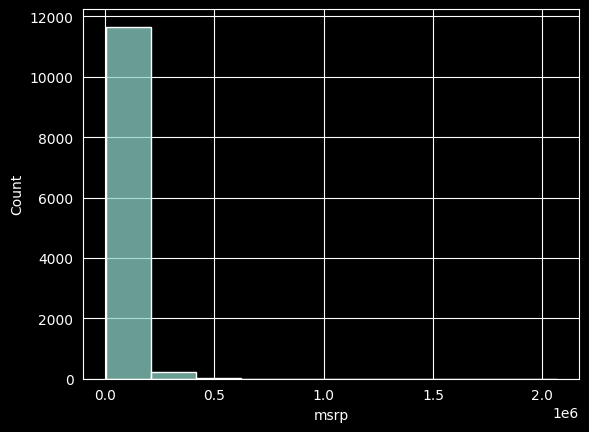

In [219]:
sns.histplot(df.msrp, bins=10)

<Axes: xlabel='msrp', ylabel='Count'>

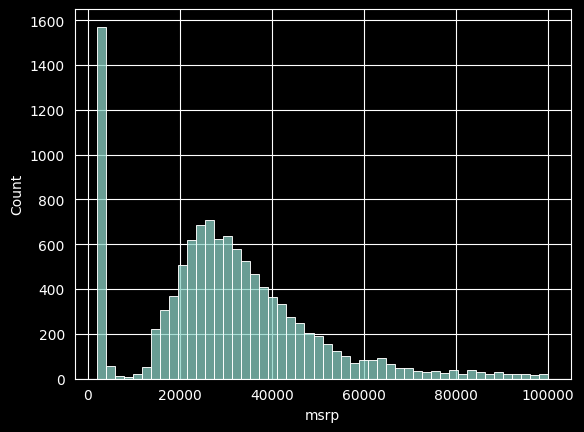

In [220]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

Les valeurs des prix sont très élevés et donc pour réduire l'effet des grandes valeurs sur notre modèle, nous allons appliquer la fonction logarithme aux prix.

In [221]:
prices_logs = np.log1p(df["msrp"])

<Axes: xlabel='msrp', ylabel='Count'>

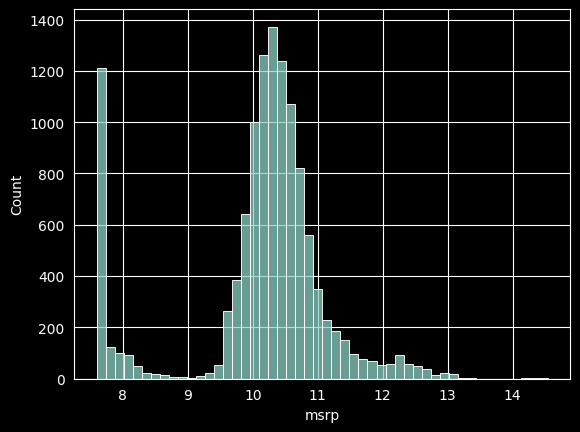

In [222]:
sns.histplot(prices_logs, bins=50)

Après cette transformation, on peut constater que le centre de notre distribution semble suivre une distribution normale

Données manquantes

In [223]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Séparation des données pour le training, validation & testing

In [224]:
N = len(df)

n_val = int(N * 0.2)
n_test = int(N * 0.2)
n_train = N - (n_test + n_val)

In [225]:
np.random.seed(25)
index = np.arange(N)
np.random.shuffle(index)
index

array([ 3205,  3617,  8608, ..., 10383,  6618,  8510], shape=(11914,))

In [226]:
df_train = df.iloc[index[:n_train]]
df_val = df.iloc[index[n_train:n_train+n_val]]
df_test = df.iloc[index[n_train+n_val:]]

In [227]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3205,cadillac,cts_coupe,2013,regular_unleaded,318.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,coupe,27,18,1624,48150
3617,dodge,durango,2015,regular_unleaded,290.0,6.0,automatic,rear_wheel_drive,4.0,"crossover,performance",large,4dr_suv,25,18,1851,30495
8608,volkswagen,routan,2010,regular_unleaded,251.0,6.0,automatic,front_wheel_drive,4.0,NaN,midsize,passenger_minivan,25,17,873,42500
8765,chevrolet,s-10,2002,regular_unleaded,190.0,6.0,automatic,rear_wheel_drive,2.0,performance,compact,regular_cab_pickup,20,15,1385,18944
3235,cadillac,cts_wagon,2013,regular_unleaded,318.0,6.0,automatic,all_wheel_drive,4.0,"luxury,performance",midsize,wagon,26,18,1624,51650


In [228]:
len(df_val), len(df_train), len(df_test)

(2382, 7150, 2382)

In [229]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)

In [230]:
df_test.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,volvo,850,1997,regular_unleaded,190.0,5.0,automatic,front_wheel_drive,4.0,"luxury,performance",midsize,wagon,24,18,870,2000
1,toyota,avalon_hybrid,2015,regular_unleaded,200.0,4.0,automatic,front_wheel_drive,4.0,hybrid,midsize,sedan,39,40,2031,36470
2,honda,civic_crx,1991,regular_unleaded,62.0,4.0,manual,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,44,36,2202,2000
3,dodge,dakota,2009,regular_unleaded,210.0,6.0,automatic,rear_wheel_drive,4.0,flex_fuel,compact,extended_cab_pickup,20,15,1851,22560
4,dodge,srt_viper,2014,premium_unleaded_(required),640.0,10.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,19,12,1851,107385


In [231]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [232]:
del df_train["msrp"]
del df_val["msrp"]
del df_test["msrp"]

In [233]:
df_val.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,audi,a3,2017,premium_unleaded_(recommended),220.0,4.0,automated_manual,all_wheel_drive,2.0,luxury,compact,convertible,34,25,3105
1,porsche,911,2016,premium_unleaded_(required),350.0,6.0,manual,all_wheel_drive,2.0,"luxury,high-performance",compact,coupe,27,19,1715
2,volvo,c30,2011,premium_unleaded_(recommended),227.0,5.0,manual,front_wheel_drive,2.0,"hatchback,luxury,performance",compact,2dr_hatchback,29,21,870
3,ferrari,enzo,2003,premium_unleaded_(required),660.0,12.0,automated_manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,12,7,2774
4,toyota,echo,2005,regular_unleaded,108.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,coupe,36,28,2031


## Mise en place du modèle

In [490]:
def prepare(df_, y_, base_cols):
    x_ = df_[base_cols].fillna(0).values
    mean_ = x_.mean(axis=0)
    std_ = x_.std(axis=0)
    x_ = (x_ - mean_) / std_
    y_ = y_.reshape(y_.shape[0], 1)
    return x_, y_

In [491]:
class LinearRegression:
    def __init__(self, x_, seed=123):
        """
        Initialisation du poids θ
        :param x_: Matrice des variables
        """
        _, n = x_.shape
        np.random.seed(seed)
        self.theta_ = np.random.randn(n+1, 1)

    def predict(self, x_):
        """
        Calcul du Modèle linéaire f(X) = X.θ
        :param x_: Matrice des variables
        """
        m, _ = x_.shape
        X_ = np.hstack(( x_, np.ones((m, 1)) ))
        return X_ @ self.theta_

    @staticmethod
    def cost_function(fx_, y_):
        """
        Fonction de coût J(θ) = 1/2m * ∑(X.θ - Y)²
        :param fx_: Matrice des valeurs prédites par le modèle
        :param y_: Matrice de la Target
        """
        m, _ = y_.shape
        return 1/(2*m) * np.sum( (fx_ - y_)**2 )

    def fit(self, x_, y_, learning_rate:float=0.01, n_iterations:int=1000):
        """
        Ajustement du modèle avec la méthode de la descente de gradient
        :param x_: Matrice des variables
        :param y_: Matrice de la Target
        :param learning_rate: Taux d'apprentissage
        :param n_iterations: Nombre d'itérations du gradient descent
        :return: Poids θ final
        """
        m, n = x_.shape
        X_ = np.hstack( (x_, np.ones((m, 1))) )
        cost_history = np.zeros(n_iterations)

        for i in range(0, n_iterations):
            self.theta_ = self.theta_ - learning_rate * (1/m * (X_.transpose().dot(self.predict(x_) - y_)))
            cost_history[i] = self.cost_function(self.predict(x_), y_)

        return cost_history

    @staticmethod
    def r_sqrt_performance(fx_, y_):
        """
        Coéfficient de Détermination R² = 1 - (∑(Y — f(x))² / ∑(Y - Ȳ)²)
        :param fx_: Matrice des valeurs prédites par le modèle
        :param y_: Matrice de la Target
        :return: R²
        """
        u = np.sum((y_ - fx_) ** 2)
        v = np.sum((y_ - y_.mean()) ** 2)
        return 1 - u/v


Selection des variables

In [492]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [493]:
X_train, y_train = prepare(df_train, y_train, base)

f(x) = ax1 + bx2 + cx3 + dx4 + ex5 + f

In [494]:
linearReg = LinearRegression(X_train, seed=987)

In [495]:
j_history_ = linearReg.fit(X_train, y_train, learning_rate=0.01, n_iterations=2000)

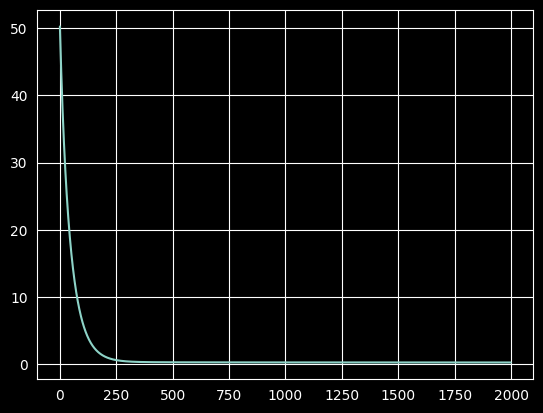

In [496]:
plt.plot(j_history_)
plt.show()

In [497]:
linearReg.theta_

array([[ 1.02964867e+00],
       [-2.54110701e-01],
       [ 8.94949679e-02],
       [ 1.88238149e-01],
       [-9.04678450e-03],
       [ 1.01193121e+01]])

In [498]:
predictions = linearReg.predict(X_train)

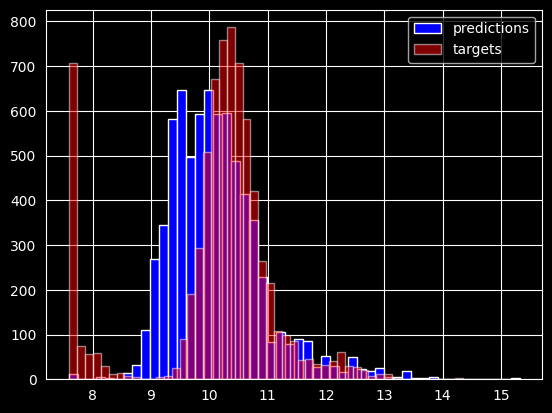

In [499]:
plt.hist(predictions, color='blue', bins=50)
plt.hist(y_train, alpha=0.5, color='red', bins=50)
plt.legend(['predictions', 'targets'])
plt.show()

In [500]:
linearReg.r_sqrt_performance(predictions, y_train)

np.float64(0.5261641223039004)

In [501]:
X_val, y_val = prepare(df_val, y_val, base)

In [502]:
predictions_val = linearReg.predict(X_val)

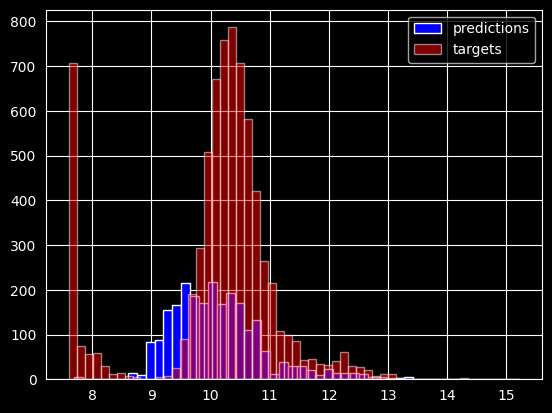

In [503]:
plt.hist(predictions_val, color='blue', bins=50)
plt.hist(y_train, alpha=0.5, color='red', bins=50)
plt.legend(['predictions', 'targets'])
plt.show()

In [504]:
linearReg.r_sqrt_performance(predictions_val, y_val)

np.float64(0.5586929519237609)

## Features Engineering

In [505]:
def prepare(df_, y_, base_cols):
    df_ = df_.copy()
    df_["age"] = 2017 - df_.year
    base_cols.append("age")

    x_ = df_[base_cols].fillna(0).values
    mean_ = x_.mean(axis=0)
    std_ = x_.std(axis=0)
    x_ = (x_ - mean_) / std_
    y_ = y_.reshape(y_.shape[0], 1)
    return x_, y_